In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from c_statistic import binned_data

In [18]:
g_table = pd.read_csv('../Output/Task2_step4.csv')
g_table.head()

,participant_ID,treatment,part,trial_no,setup_cost_red,setup_cost_blue,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,1.0,1.0,2.0,1.0,10.0,10.0,0.7,1,0,1.0,0,0,0,-1.0,0.700000,1.0,0.0,6016.7120
1,1.0,1.0,2.0,1.0,10.0,10.0,0.7,2,0,1.0,0,1,0,-1.0,0.756757,1.0,0.0,6733.3740
2,1.0,1.0,2.0,1.0,10.0,10.0,0.7,3,0,1.0,0,2,0,-1.0,0.805755,1.0,0.0,7383.4022
3,1.0,1.0,2.0,1.0,10.0,10.0,0.7,4,0,1.0,0,3,0,-1.0,0.846881,1.0,0.0,8000.0214
4,1.0,1.0,2.0,1.0,10.0,10.0,0.7,5,0,1.0,0,4,0,-1.0,0.880590,1.0,0.0,8716.7231


In [76]:
n_bins = 10
action = g_table.loc[(g_table['action_type'] == 1)]
action = action.reset_index(drop = True)
sus_avg_b = binned_data(action, n_bins)


action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] < 0.5)]
action = action.reset_index(drop = True)
sus_avg_r = binned_data(action, n_bins)

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] > 0.5)]
action = action.reset_index(drop = True)
sus_avg_u = binned_data(action, n_bins)

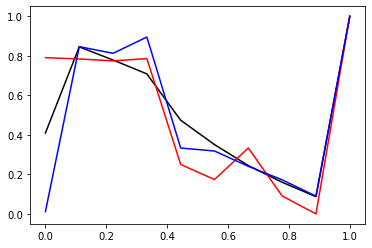

In [77]:
plt.plot(np.linspace(0, 1, n_bins), sus_avg_b, 'black')
plt.plot(np.linspace(0, 1, n_bins),sus_avg_r, 'red')
plt.plot(np.linspace(0, 1, n_bins),sus_avg_u, 'blue')
plt.show()